# Yucatan Peninsula Hurricanes

## 1. Archive exploration


This data describes the Saffir-Simpson hurricane category, track, name, and duration for Atlantic hurricanes since 1851. The data is specifically derived from computer simulated modeling of Atlantic hurricanes in the Yucatan Peninsula during Atlantic Hurricane Season.

**Citation**

Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

## 2. Data loading and preliminary exploration


In [93]:
# Import neccessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Read in data
df = pd.read_csv("data/hf071-01-hurricanes.csv")

# Take a look at first few rows
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [95]:
# How many NAs per column? 
df.isnull().sum()

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64

In [96]:
# Take a look at additional characteristics like dimensions, data structure type per column, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB


Notably, there are 72 missing observations in `name`.

## 3. Brainstorm

In this session we want to answer the following question:
   
   **How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?**
    
a. Individually, write down step-by-step instructions on how you would wrangle the df data frame to answer the question. Do not code anything yet. Remember: It’s okay if you don’t know how to code each step. The important thing is to have an idea of what you’d like to do.

b. Discuss your step-by-step instructions with your team. What do you see as potential challenges to implementing your plan?

c. As a team, select an initial data wrangling plan for answering the question.



In [97]:
#a. How to wrangle? 
# 1. Filter for Category 5 hurricanes (get dimensions for observations)
# 2. Convert data columns to datetime64 data type
# 3. Create a new column called "duration" (difference between end date and start date)

## 4. Data wrangling
Use your plan as a starting point to answer the question.

- You may (or not) need to look online to carry out some of the steps in your plan. It is completely fine to seek help online! Resourceful troubleshooting is a key skill in data science.
- It’s ok if your initial plan changes as you work with the data and discuss challenges with your team! This brainstorm is to create a shared starting point.


In [98]:
# 1. Filter for Category 5 hurricanes (get dimensions for observations)
df_cat5 = df[df["ss"] == 5].copy()
print("There have been", df_cat5.shape[0], "Category 5 hurricanes since 1851.")

There have been 4 Category 5 hurricanes since 1851.


In [99]:
# 2. Convert date columns to datetime64 data type
df_cat5.loc[:,"start.date"] = pd.to_datetime(df_cat5["start.date"]) # Grab all rows 
df_cat5.loc[:,"end.date"] = pd.to_datetime(df_cat5["end.date"]) # Grab all rows

# Confirm date time type
df_cat5.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [100]:
# 3. Create a new column called "duration" (difference between end date and start date)
df_cat5["duration"] = df_cat5["end.date"] - df_cat5["start.date"]

# Take a look at the first few rows to confirm "duration" column values
df_cat5.head()

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28 00:00:00,1955-09-28 00:00:00,10,Janet,5,N,F3,0 days 00:00:00
96,Y1980a,1980-08-07 00:00:00,1980-08-08 00:00:00,1,Allen,5,O,F3,1 days 00:00:00
98,Y1988,1988-09-14 00:00:00,1988-09-15 00:00:00,8,Gilbert,5,N,F3,1 days 00:00:00
103,Y1998,1998-10-27 00:00:00,1998-10-28 00:00:00,13,Mitch,5,S,F1,1 days 00:00:00


## 5: Visualize Saffir-Simpson categories across time
a. Create a scatter plot of the start date of the hurricanes against the Saffir-Simpson scale. Use matplotlib to customize your graph, including updating the tick labels to be only 1, 2, 3, 4, and 5 since the Saffir-Simpsn scale does not take decimal values.

b. Analyze your plot and write (in full sentences!) any trends that you observe.

 **Don’t forget to commit, pull, and push.**

([<matplotlib.axis.YTick at 0x7fb5e4dd1210>,
 [Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5')])

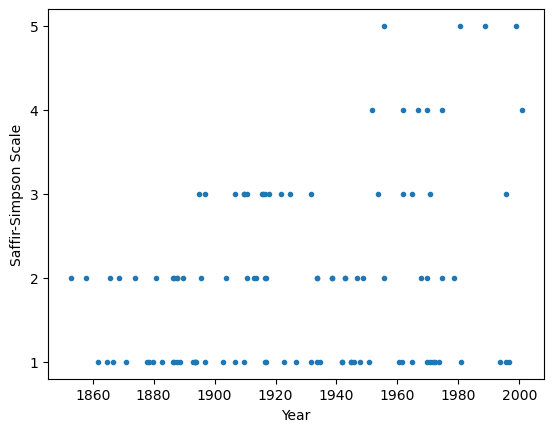

In [101]:
#df.plot(kind = "scatter", x = "start.date", y = "number", title = "Saffir-Simpson Categories for Atlantic Hurricanes (1851-2000)")
df.loc[:,"start.date"] = pd.to_datetime(df["start.date"]) # Grab all rows 
df.loc[:,"end.date"] = pd.to_datetime(df["end.date"]) # Grab all rows

# Create a scatter plot of the date a hurricane formed against the scale assignment of a hurricane  
plt.scatter("start.date", "ss", data = df, marker = ".")
plt.xlabel("Year")
plt.ylabel("Saffir-Simpson Scale") 
plt.yticks([1,2,3,4,5])

## 6. Collect your code and explain your results
a. In a new code cell, collect all the relevant code to create a streamlined workflow to obtain the final data to answer the question. Your code cell should:
- Only print the final results.
- Not include output from intermediate variables or checks.
- Not include methods or functions that do not directly contribute to the analysis (even if they don’t print anything ex: df.head()).
- If appropriate, combine methods using code chaining instead of creating intermediate variables.
- Comment your code following our class comments guidelines.
- Use appropriate line breaks and indentation to make code readable.




b. Write a full sentence explaining your answer to the question in (3). Don’t forget to include units. You may also want to include any insights about the rest of the data for the Category 5 hurricanes.


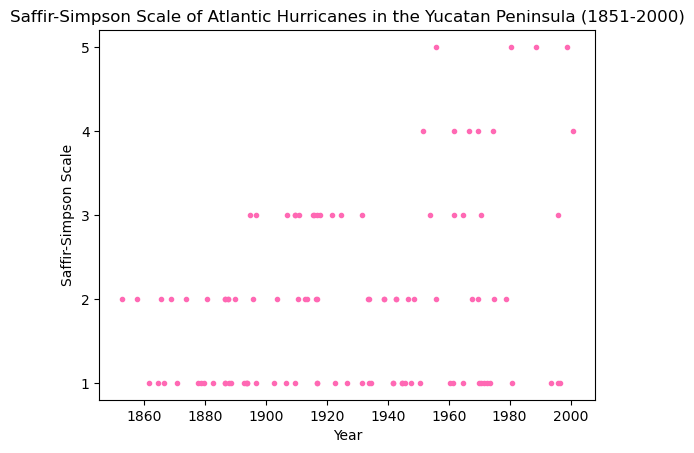

In [102]:
# Import neccessary packages
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv("data/hf071-01-hurricanes.csv")

# Take a look at first few rows
df.head()

# Convert date columns to date_time data type
df.loc[:,"start.date"] = pd.to_datetime(df["start.date"]) # Grab all rows 
df.loc[:,"end.date"] = pd.to_datetime(df["end.date"]) # Grab all rows

# Create a scatter plot of the date a hurricane formed against the scale assignment of a hurricane  
plt.scatter("start.date", "ss", data = df, marker = ".", color = "hotpink")
plt.xlabel("Year")
plt.ylabel("Saffir-Simpson Scale") 
plt.title("Saffir-Simpson Scale of Atlantic Hurricanes in the Yucatan Peninsula (1851-2000)")
plt.yticks([1,2,3,4,5])

plt.show()

**Since 1851, there have been four Category 5 hurricanes, six Category 4 hurricanes, and several Category 1-3 hurricanes. Increased hurricane activity in recent years suggest the influence of climate change on storm activity, especially in the warm waters of the Atlantic.**